In [294]:
%cd harmonics/

[Errno 2] No such file or directory: 'harmonics/'
/home/matias/HDD/Dropbox/apps/harmonics


In [417]:
import pandas as pd
import yaml
import importlib
import harmonics, midi
def rel():
    importlib.reload(harmonics)
    importlib.reload(midi)
from mido import MidiFile
import mido
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
rel()

class MidiAnalyzer():
    def __init__(self,folder,clip=True):
        self.MIDI = {}
        for file in os.listdir(folder):
            if '.mid' in file:
                self.MIDI[file] = MidiFile(os.path.join(folder,file),clip=clip)
        self.files = list(self.MIDI.keys())
        self.name = [[vars(a)['name'] for a in self.MIDI[f].tracks[0] if vars(a)['type']=='track_name'] for f in self.files]
        self.text = [[vars(a)['text'] for a in self.MIDI[f].tracks[0] if vars(a)['type']=='text'] for f in self.files]

In [364]:
anthro = harmonics.Song('data/weimar_jazz_database/RELEASE2.0_mid_unquant/ArtPepper_Anthropology_FINAL.mid')

In [365]:
(harmonics.Note('D')+harmonics.Interval(12))/harmonics.Note('C')

'-2 octaves and 10 semitones'

In [451]:
rel()


In [392]:
drums.df[(drums.df.type == 'note_on') | (drums.df.type == 'note_off')]

,type,text,time,note,velocity,channel,program,control,value,track,meta,ticks,beat,current_beat
1,note_on,NaN,0,42.0,79.0,9.0,NaN,NaN,NaN,0,False,0,0.000000,0.0
2,note_on,NaN,0,36.0,127.0,9.0,NaN,NaN,NaN,0,False,0,0.000000,0.0
9,note_off,NaN,40,36.0,127.0,9.0,NaN,NaN,NaN,0,False,40,0.208333,1.0
10,note_on,NaN,56,46.0,95.0,9.0,NaN,NaN,NaN,0,False,96,0.500000,1.0
11,note_off,NaN,2,42.0,79.0,9.0,NaN,NaN,NaN,0,False,98,0.510417,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,note_on,NaN,8,46.0,84.0,9.0,NaN,NaN,NaN,0,False,2976,15.500000,16.0
182,note_on,NaN,0,36.0,127.0,9.0,NaN,NaN,NaN,0,False,2976,15.500000,16.0
184,note_off,NaN,2,42.0,79.0,9.0,NaN,NaN,NaN,0,False,2982,15.531250,16.0
187,note_off,NaN,28,36.0,127.0,9.0,NaN,NaN,NaN,0,False,3017,15.713542,16.0


{36.0, 42.0, 46.0}

In [443]:
%timeit drums = harmonics.Song('data/minor9/grooves/16_BEAT1.MID')

239 ms ± 6.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [494]:
%timeit s = harmonics.Song('data/jazzmidi/99_miles_from_l_a-kar_rt.mid')

12 s ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [508]:
s.MIDI

MidiFile(type=1, ticks_per_beat=120, tracks=[
  MidiTrack([
    MetaMessage('track_name', name='99 Miles From L.A.', time=0),
    MetaMessage('text', text='99 Miles From L.A.\n', time=0),
    MetaMessage('text', text='Words and Music by:  Hal David and Albert Hammond\n', time=0),
    MetaMessage('text', text='Performed by:  Johnny Mathis  (1977)\n', time=0),
    MetaMessage('text', text='Sequence and Karaoke by:  Ron Tilden\n', time=0),
    MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
    MetaMessage('key_signature', key='Bb', time=0),
    MetaMessage('set_tempo', tempo=319149, time=0),
    MetaMessage('sequencer_specific', data=(0, 0, 0, 106, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 23, 0, 0, 0, 0, 0, 0,

In [511]:
df2 = df.copy()

In [515]:
df2[df2.type == 'note_off'].time = df2[df2.type == 'note_off'].time/2000000

/tmp/ipykernel_49630/2748774653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[df2.type == 'note_off'].time = df2[df2.type == 'note_off'].time/2000000


In [516]:
df2

,type,time,note,velocity,channel,track,meta,ticks,beat,current_beat
1,note_on,0,42.0,79.0,9.0,0,False,0,0.000000,0.0
11,note_off,2,42.0,79.0,9.0,0,False,98,0.510417,1.0
16,note_on,0,42.0,82.0,9.0,0,False,192,1.000000,1.0
20,note_off,6,42.0,82.0,9.0,0,False,294,1.531250,2.0
25,note_on,6,42.0,76.0,9.0,0,False,384,2.000000,2.0
30,note_off,1,42.0,76.0,9.0,0,False,481,2.505208,3.0
36,note_on,8,42.0,79.0,9.0,0,False,576,3.000000,3.0
43,note_off,2,42.0,79.0,9.0,0,False,678,3.531250,4.0
48,note_on,2,42.0,79.0,9.0,0,False,768,4.000000,4.0
58,note_off,2,42.0,79.0,9.0,0,False,866,4.510417,5.0


In [507]:
s['notes'][s['notes'].track==3]

,type,time,track,meta,channel,note,velocity,ticks,beat,current_beat
7,note_on,2400,3,False,0.0,71.0,105.0,169486,1412.383333,1413.0
8,note_on,160,3,False,0.0,71.0,0.0,169646,1413.716667,1414.0
9,note_on,20,3,False,0.0,71.0,105.0,169666,1413.883333,1414.0
10,note_on,160,3,False,0.0,71.0,0.0,169826,1415.216667,1416.0
11,note_on,20,3,False,0.0,71.0,105.0,169846,1415.383333,1416.0
...,...,...,...,...,...,...,...,...,...,...
404,note_on,100,3,False,0.0,67.0,0.0,250106,2084.216667,2085.0
405,note_on,20,3,False,0.0,68.0,105.0,250126,2084.383333,2085.0
406,note_on,160,3,False,0.0,68.0,0.0,250286,2085.716667,2086.0
407,note_on,20,3,False,0.0,67.0,105.0,250306,2085.883333,2086.0


Took 14.020062685012817 seconds


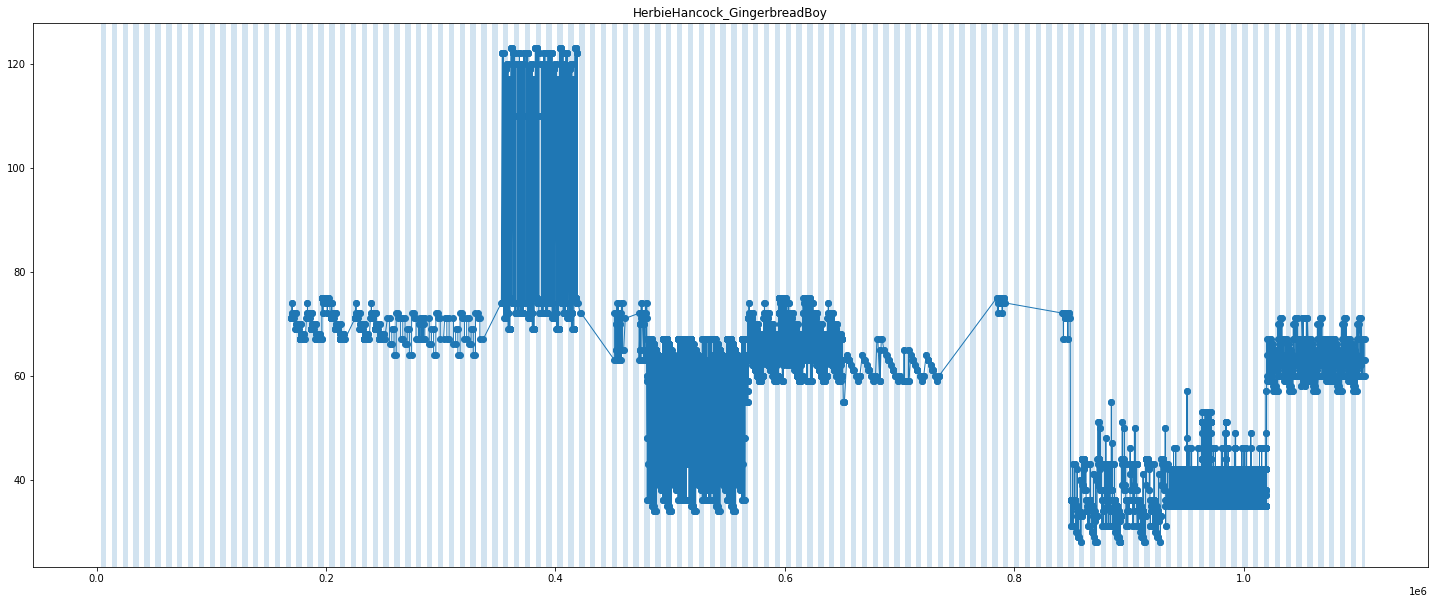

In [492]:
import time
start = time.time()
drums = harmonics.Song('data/jazzmidi/99_miles_from_l_a-kar_rt.mid')
def plot_drums(obj):
    df = drums['notes']
    notes = list(set(df.note))
    notes.sort(reverse=True)
    fig,axes = plt.subplots(1,figsize=(25,10))
    positions = []
    note_arr = []
    for n,note in enumerate(notes):
        tdf = df[df.note == note]
        #durations = tdf[tdf.type == 'note_off'].ticks.values - tdf[tdf.type == 'note_on'].ticks.values
        new_positions = tdf[tdf.type == 'note_on'].ticks.values
        positions = np.concatenate((positions,new_positions))
        note_arr = np.concatenate((note_arr,np.array([note for i in range(len(new_positions))])))
        label = harmonics.Note(note)
    t=0
    while t < df.ticks.max():
        axes.axvspan(t,t+4*obj.MIDI.ticks_per_beat,alpha=0.2)
        t += 8*obj.MIDI.ticks_per_beat
    se = pd.Series(note_arr,index=positions)
    se.sort_index(inplace=True)
    axes.scatter(positions,note_arr)
    axes.plot(se,linewidth=1)
    axes.set_title('HerbieHancock_GingerbreadBoy')
print(f'Took {time.time() - start} seconds')
plot_drums(drums)

Took 0.8464140892028809 seconds


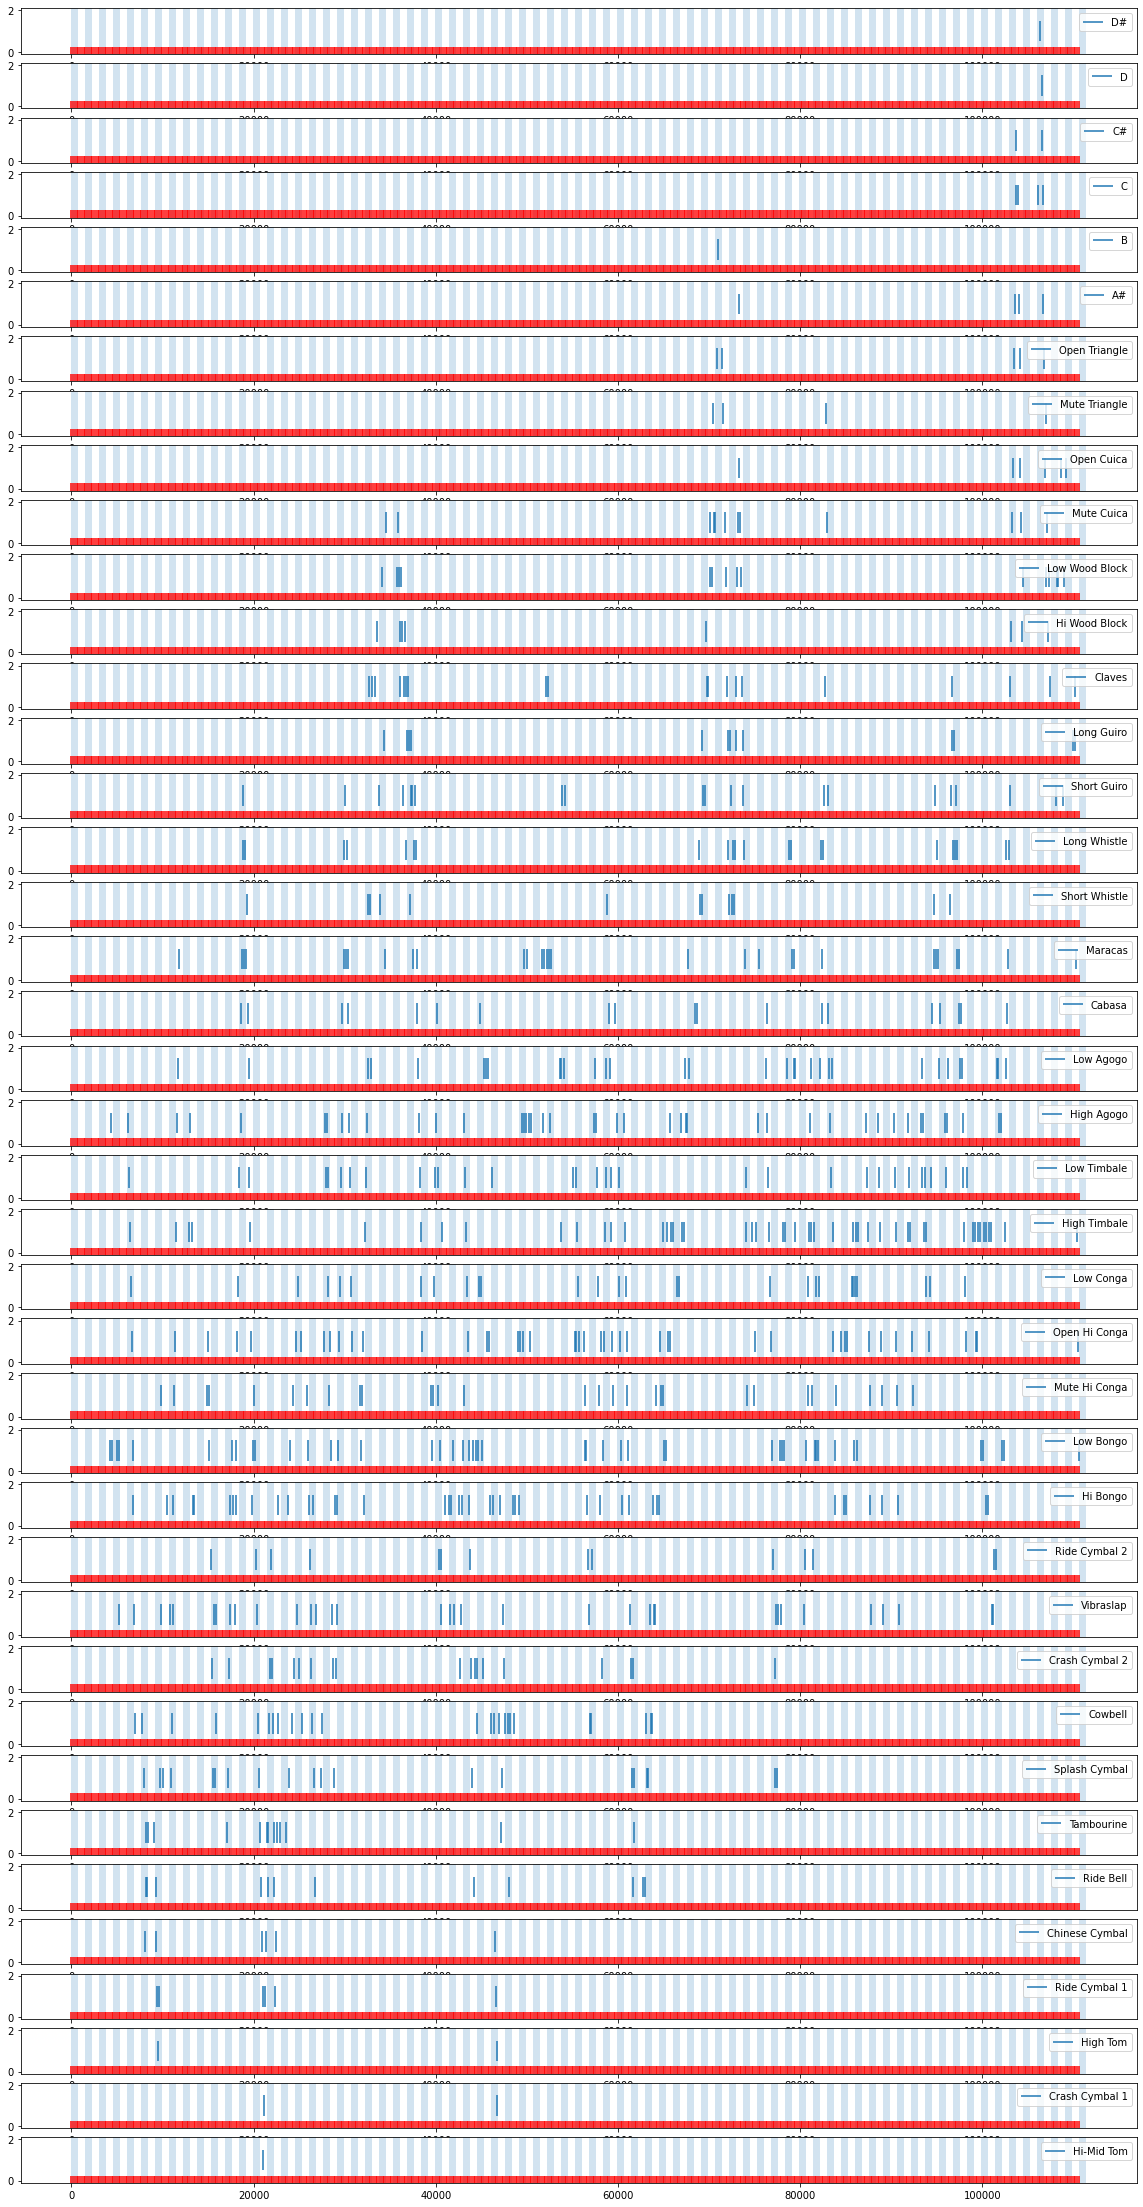

In [471]:
import time
start = time.time()
drums = harmonics.Song('data/weimar_jazz_database/RELEASE2.0_mid_unquant/HerbieHancock_GingerbreadBoy_FINAL.mid')
def plot_drums(obj):
    df = drums['notes']
    notes = list(set(df.note))
    notes.sort(reverse=True)
    fig,axes = plt.subplots(len(notes),figsize=(20,len(notes)))
    for n,note in enumerate(notes):
        tdf = df[df.note == note]
        durations = tdf[tdf.type == 'note_off'].ticks.values - tdf[tdf.type == 'note_on'].ticks.values
        positions = tdf[tdf.type == 'note_on'].ticks.values
        axes[n].eventplot(positions)
        try:
            label = obj.DRUM_KEYMAP[note]
        except:
            label = harmonics.Note(note)
        axes[n].legend((label,))
        t = 0
        while t < df.ticks.max():
            axes[n].axvspan(t,t+4*obj.MIDI.ticks_per_beat,alpha=0.2)
            t += 8*obj.MIDI.ticks_per_beat
        axes[n].eventplot([i for i in range(0,df.ticks.max(),obj.MIDI.ticks_per_beat)],lineoffset=0,color='r',linelength=0.5)
print(f'Took {time.time() - start} seconds')
plot_drums(drums)

In [382]:
drums.MIDI.ticks_per_beat

192

In [368]:
harmonics.Instrument.CFG['DRUM_KEYMAP']

{35: 'Acoustic Bass Drum',
 36: 'Bass Drum 1',
 37: 'Side Stick',
 38: 'Acoustic Snare',
 39: 'Hand Clap',
 40: 'Electric Snare',
 41: 'Low Floor Tom',
 42: 'Closed Hi-Hat',
 43: 'High Floor Tom',
 44: 'Pedal Hi-Hat',
 45: 'Low Tom',
 46: 'Open Hi-Hat',
 47: 'Low-Mid Tom',
 48: 'Hi-Mid Tom',
 49: 'Crash Cymbal 1',
 50: 'High Tom',
 51: 'Ride Cymbal 1',
 52: 'Chinese Cymbal',
 53: 'Ride Bell',
 54: 'Tambourine',
 55: 'Splash Cymbal',
 56: 'Cowbell',
 57: 'Crash Cymbal 2',
 58: 'Vibraslap',
 59: 'Ride Cymbal 2',
 60: 'Hi Bongo',
 61: 'Low Bongo',
 62: 'Mute Hi Conga',
 63: 'Open Hi Conga',
 64: 'Low Conga',
 65: 'High Timbale',
 66: 'Low Timbale',
 67: 'High Agogo',
 68: 'Low Agogo',
 69: 'Cabasa',
 70: 'Maracas',
 71: 'Short Whistle',
 72: 'Long Whistle',
 73: 'Short Guiro',
 74: 'Long Guiro',
 75: 'Claves',
 76: 'Hi Wood Block',
 77: 'Low Wood Block',
 78: 'Mute Cuica',
 79: 'Open Cuica',
 80: 'Mute Triangle',
 81: 'Open Triangle'}

In [324]:
drums.df

,type,text,time,note,velocity,channel,program,control,value,track,meta
0,text,BD1,0,NaN,NaN,NaN,NaN,NaN,NaN,0,True
1,note_on,NaN,0,42.0,79.0,9.0,NaN,NaN,NaN,0,False
2,note_on,NaN,0,36.0,127.0,9.0,NaN,NaN,NaN,0,False
3,program_change,NaN,0,NaN,NaN,9.0,25.0,NaN,NaN,0,False
4,control_change,NaN,0,NaN,NaN,9.0,NaN,93.0,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
185,aftertouch,NaN,2,NaN,NaN,9.0,NaN,NaN,1.0,0,False
186,aftertouch,NaN,5,NaN,NaN,9.0,NaN,NaN,0.0,0,False
187,note_off,NaN,28,36.0,127.0,9.0,NaN,NaN,NaN,0,False
188,note_off,NaN,53,46.0,84.0,9.0,NaN,NaN,NaN,0,False


In [ ]:
tuple([12,11])[0]

In [ ]:
def invert(interval):
    if interval == 0:
        return 0
    if interval > 0:
        return interval%12

In [ ]:
[c for c in harmonics.Music.EDICT[]]

In [ ]:
'7'.isnumeric()

In [ ]:
rel()
m =(harmonics.Melody('arp_M7')  + harmonics.Melody('arp_M7'))

In [ ]:
m.ref_note

In [ ]:
harmonics.Chord(chord='I')

In [ ]:
~(harmonics.Note(60) // harmonics.Note(103))

In [ ]:
tra = anthro.MIDI.tracks[0]

In [ ]:
df = anthro.df
df

In [ ]:


#for n,t in enumerate(m.tracks)
#Song('groove_midi/groove/drummer1/session3/10_rock-folk_90_beat_4-4.mid').df.tempo.dropna().values

In [ ]:
mido.Message('note_on')